In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path = 'data/TruckInTheRockies.jpg'
plt.rcParams['figure.figsize'] = [16, 8]

In [3]:
# https://goodcalculators.com/rgb-to-grayscale-conversion-calculator/
def gray_conversion(image):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    gray_value = 0.299 * red + 0.587 * green + 0.114 * blue
    gray_img = gray_value.astype(np.uint8)
    return gray_img

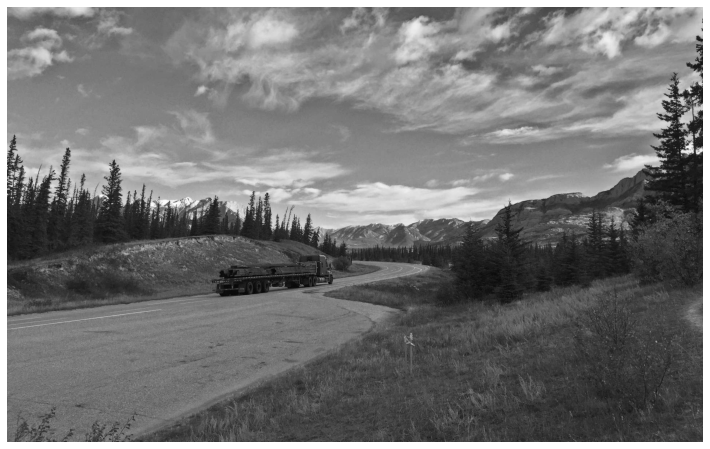

In [4]:
A = imread(image_path)
X = gray_conversion(A)

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Original shape u: (1200, 1200)
Original shape diagonalized_sigma: (1200, 1200)
Original shape vT: (1200, 1920)


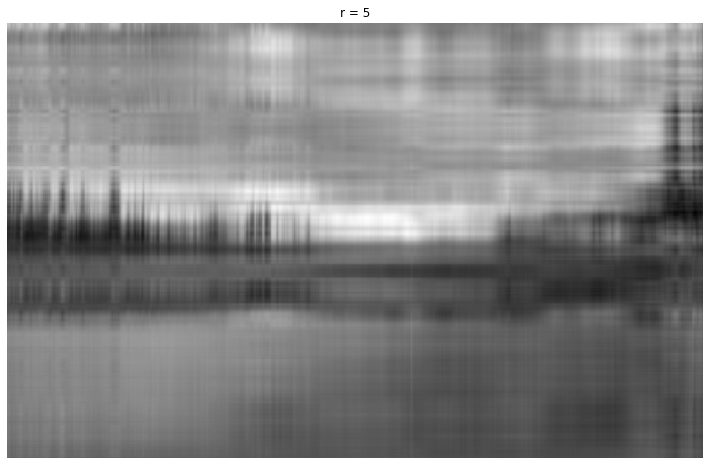

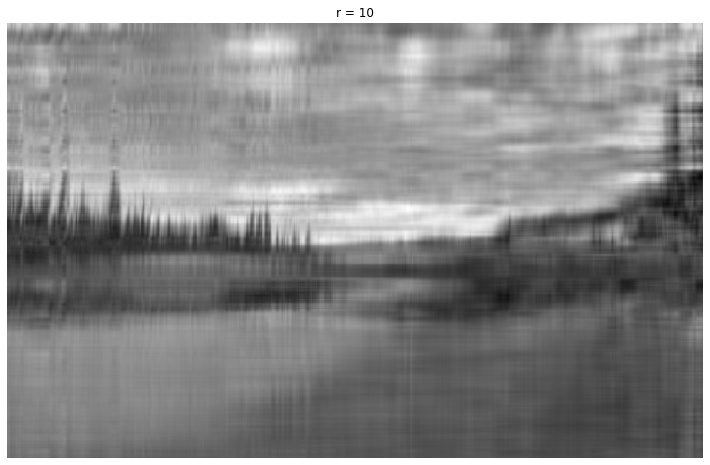

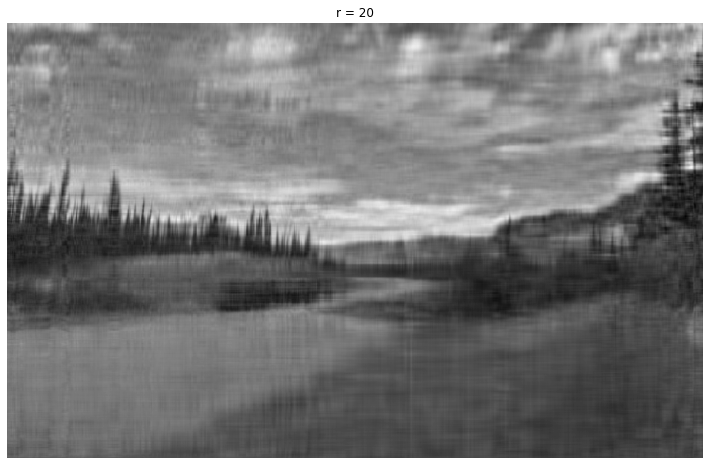

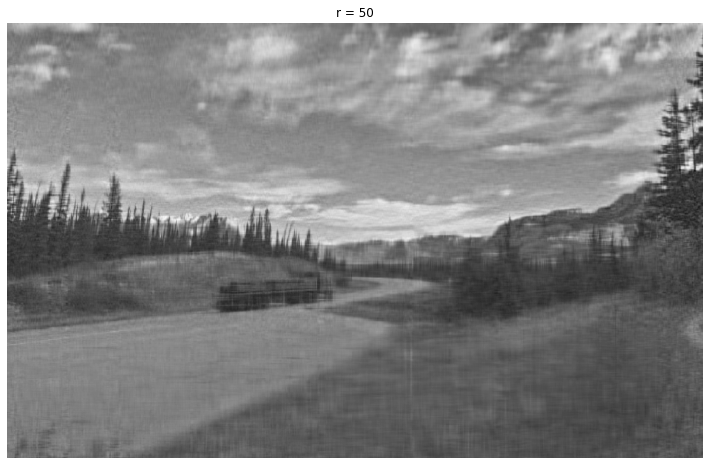

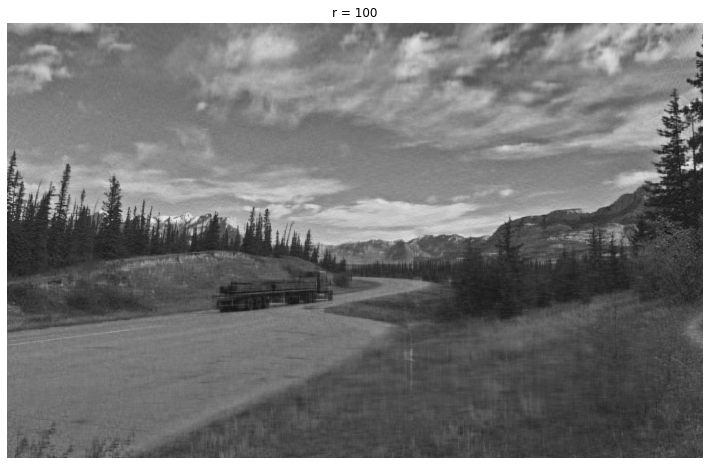

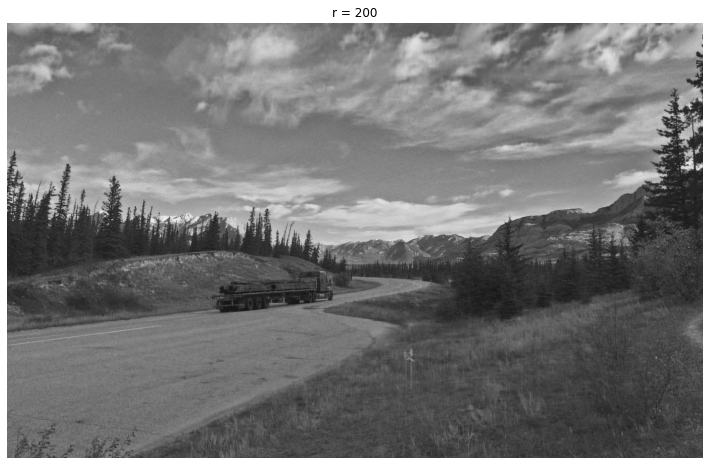

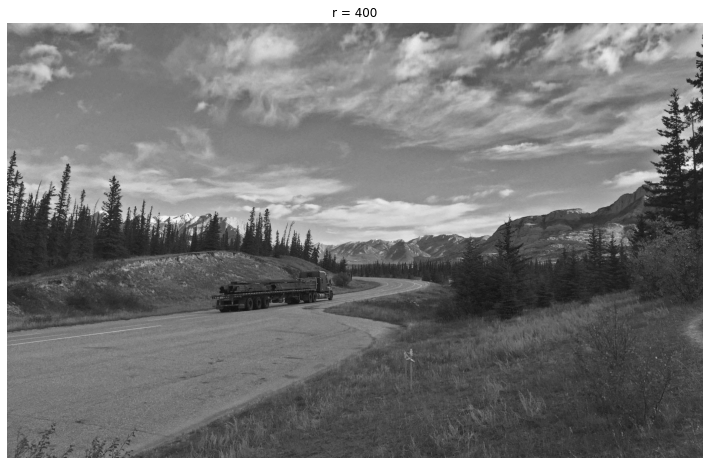

In [5]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html#numpy-linalg-svd
# `full_matrices = False` since the matrices are not square
u, sigma, vT = np.linalg.svd(X, full_matrices=False)
diagonalized_sigma = np.diag(sigma)

print(f"Original shape u: {u.shape}")
print(f"Original shape diagonalized_sigma: {diagonalized_sigma.shape}")
print(f"Original shape vT: {vT.shape}")

for i, r in enumerate((5, 10, 20, 50, 100, 200, 400)):
    plt.figure(i)
    # https://docs.python.org/3/library/operator.html#mapping-operators-to-functions
    # `@` is a matrix multiplication
    X_approximation = u[:, :r] @ diagonalized_sigma[:r, :r] @ vT[:r, :]
    img = plt.imshow(X_approximation)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f"r = {r}")
    plt.show()

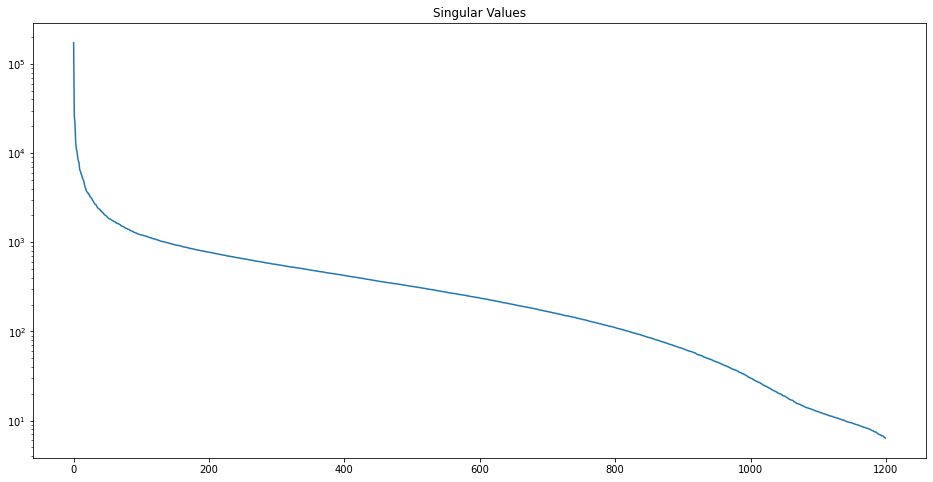

In [6]:
plt.figure()
# Make a plot with log scaling on the y axis.
plt.semilogy(np.diag(diagonalized_sigma))
plt.title('Singular Values')
plt.show()

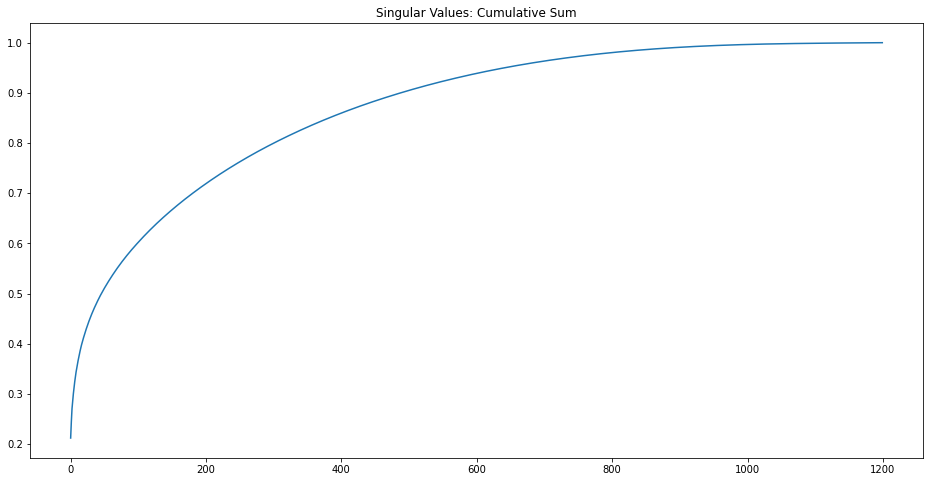

In [7]:
plt.figure()
plt.plot(np.cumsum(np.diag(diagonalized_sigma)) / np.sum(np.diag(diagonalized_sigma)))
plt.title('Singular Values: Cumulative Sum')
plt.show()